<a href="https://colab.research.google.com/github/BlocklyS/smartEDA/blob/main/DataExplorer_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# this line of code prints the version of R being used (in colab change runtime to R kernel)
print(R.version.string)

[1] "R version 4.3.2 (2023-10-31)"


In [4]:
# Install and load required packages
required_packages <- c("janitor","DataExplorer")

# Check if packages are installed and install them if not
missing_packages <- setdiff(required_packages, installed.packages()[,"Package"])
if (length(missing_packages) > 0) {
  install.packages(missing_packages)
}


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘htmlwidgets’, ‘igraph’, ‘snakecase’, ‘reshape2’, ‘gridExtra’, ‘networkD3’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [5]:
# Load the required packages
library(tidyverse)
library(janitor)
library(DataExplorer)

In [6]:
# Read file on a given URL
# Use read.csv function to parse the data and store in a variable named 'world_data'
world_data <- read.csv("https://raw.githubusercontent.com/BlocklyS/smartEDA/main/world-data-2023.csv")


In [7]:
# Display the first few rows of a data frame (snapshot)
head(world_data)

,Country,Density..P.Km2.,Abbreviation,Agricultural.Land....,Land.Area.Km2.,Armed.Forces.size,Birth.Rate,Calling.Code,Capital.Major.City,Co2.Emissions,⋯,Out.of.pocket.health.expenditure,Physicians.per.thousand,Population,Population..Labor.force.participation....,Tax.revenue....,Total.tax.rate,Unemployment.rate,Urban_population,Latitude,Longitude
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93,Kabul,"8,672",⋯,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.93911,67.709953
2,Albania,105,AL,43.10%,"28,748","9,000",11.78,355,Tirana,"4,536",⋯,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.15333,20.168331
3,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213,Algiers,"150,006",⋯,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.03389,1.659626
4,Andorra,164,AD,40.00%,468,,7.20,376,Andorra la Vella,469,⋯,36.40%,3.33,"77,142",,,,,"67,873",42.50628,1.521801
5,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244,Luanda,"34,693",⋯,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.20269,17.873887
6,Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1,"St. John's, Saint John",557,⋯,24.30%,2.76,"97,118",,16.50%,43.00%,,"23,800",17.06082,-61.796428


In [8]:
tail(world_data)

,Country,Density..P.Km2.,Abbreviation,Agricultural.Land....,Land.Area.Km2.,Armed.Forces.size,Birth.Rate,Calling.Code,Capital.Major.City,Co2.Emissions,⋯,Out.of.pocket.health.expenditure,Physicians.per.thousand,Population,Population..Labor.force.participation....,Tax.revenue....,Total.tax.rate,Unemployment.rate,Urban_population,Latitude,Longitude
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
190,Vanuatu,25,VU,15.30%,"12,189",,29.60,678,Port Vila,147,⋯,8.90%,0.17,"299,882",69.90%,17.80%,8.50%,4.39%,"76,152",-15.37671,166.95916
191,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58,Caracas,"164,175",⋯,45.80%,1.92,"28,515,829",59.70%,,73.30%,8.80%,"25,162,368",6.42375,-66.58973
192,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84,Hanoi,"192,668",⋯,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.05832,108.27720
193,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967,Sanaa,"10,609",⋯,81.00%,0.31,"29,161,922",38.00%,,26.60%,12.91%,"10,869,523",15.55273,48.51639
194,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260,Lusaka,"5,141",⋯,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.13390,27.84933
195,Zimbabwe,38,ZW,41.90%,"390,757","51,000",30.68,263,Harare,"10,983",⋯,25.80%,0.21,"14,645,468",83.10%,20.70%,31.60%,4.95%,"4,717,305",-19.01544,29.15486


In [9]:
# give a concise representation of the R object 'dataframe' (names of the columns, the type of data in each column..)
str(world_data)

'data.frame':	195 obs. of  35 variables:
 $ Country                                  : chr  "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ Density..P.Km2.                          : chr  "60" "105" "18" "164" ...
 $ Abbreviation                             : chr  "AF" "AL" "DZ" "AD" ...
 $ Agricultural.Land....                    : chr  "58.10%" "43.10%" "17.40%" "40.00%" ...
 $ Land.Area.Km2.                           : chr  "652,230" "28,748" "2,381,741" "468" ...
 $ Armed.Forces.size                        : chr  "323,000" "9,000" "317,000" "" ...
 $ Birth.Rate                               : num  32.5 11.8 24.3 7.2 40.7 ...
 $ Calling.Code                             : int  93 355 213 376 244 1 54 374 61 43 ...
 $ Capital.Major.City                       : chr  "Kabul" "Tirana" "Algiers" "Andorra la Vella" ...
 $ Co2.Emissions                            : chr  "8,672" "4,536" "150,006" "469" ...
 $ CPI                                      : chr  "149.9" "119.05" "151.36" "" ...

In [10]:
# Using clean_names function from Janitor package to standardize column names
try({  # The try function is used to capture any errors that may occur during the execution of clean_names
  clean_data <- clean_names(world_data)  # If an error occurs, it is suppressed, and the result is stored in the clean_data variable
}, silent = TRUE) # After attempting to clean the column names, the code checks if the clean_data variable exists.
if (!exists("clean_data")) stop("Error in cleaning data column names.") # If it doesn't, it means that there was an error during the cleaning process, and an error message is raised.

# Identifying character columns
try({
  char_cols <- sapply(clean_data, is.character) # The sapply function is used to apply the is.character function to each column of clean_data; results in vector char_cols
}, silent = TRUE)
if (!exists("char_cols")) stop("Error in identifying character columns.")

# Exclude certain columns from transformation
exclude_cols <- c("country", "abbreviation", "capital_major_city", "currency_code","largest_city","official_language") #define vector of cols to not transfrom
if (!all(exclude_cols %in% names(clean_data))) stop("One or more column names to exclude not found in data.")# The code checks if all the column names listed in exclude_cols exist in the clean_data dataset using the %in% operator.
char_cols[exclude_cols] <- FALSE

# Convert remaining character columns to numeric, removing any special characters
try({
  clean_data[char_cols] <- lapply(clean_data[char_cols], function(x) {
    x <- gsub("[%,\\$]", "", x) # gsub is used to remove the special characters
    ifelse(is.na(x), NA, as.numeric(x)) # as.numeric is used to convert the column to a numeric data type
  })
}, silent = TRUE)

In [11]:
# list the clean column names
names (clean_data)

[1] "country"                             
 [2] "density_p_km2"                       
 [3] "abbreviation"                        
 [4] "agricultural_land"                   
 [5] "land_area_km2"                       
 [6] "armed_forces_size"                   
 [7] "birth_rate"                          
 [8] "calling_code"                        
 [9] "capital_major_city"                  
[10] "co2_emissions"                       
[11] "cpi"                                 
[12] "cpi_change"                          
[13] "currency_code"                       
[14] "fertility_rate"                      
[15] "forested_area"                       
[16] "gasoline_price"                      
[17] "gdp"                                 
[18] "gross_primary_education_enrollment"  
[19] "gross_tertiary_education_enrollment" 
[20] "infant_mortality"                    
[21] "largest_city"                        
[22] "life_expectancy"                     
[23] "maternal_mortality_ratio"            
[24] "minimum_wage"                        
[25] "official_language"                   
[26] "out_of_pocket_health_expenditure"    
[27] "physicians_per_thousand"             
[28] "population"                          
[29] "population_labor_force_participation"
[30] "tax_revenue"                         
[31] "total_tax_rate"                      
[32] "unemployment_rate"                   
[33] "urban_population"                    
[34] "latitude"                            
[35] "longitude"

In [12]:
# generate a summary of the dataset's basic statistics and characteristics.
summary(clean_data)

   country          density_p_km2     abbreviation       agricultural_land
 Length:195         Min.   :    2.0   Length:195         Min.   : 0.60    
 Class :character   1st Qu.:   35.5   Class :character   1st Qu.:21.70    
 Mode  :character   Median :   89.0   Mode  :character   Median :39.60    
                    Mean   :  356.8                      Mean   :39.12    
                    3rd Qu.:  216.5                      3rd Qu.:55.38    
                    Max.   :26337.0                      Max.   :82.60    
                                                         NA's   :7        
 land_area_km2      armed_forces_size   birth_rate     calling_code   
 Min.   :       0   Min.   :      0   Min.   : 5.90   Min.   :   1.0  
 1st Qu.:   23828   1st Qu.:  11000   1st Qu.:11.30   1st Qu.:  82.5  
 Median :  119511   Median :  31000   Median :17.95   Median : 255.5  
 Mean   :  689624   Mean   : 159275   Mean   :20.21   Mean   : 360.5  
 3rd Qu.:  524256   3rd Qu.: 142000   3rd Qu.

In [13]:
# Data Explorer EDA function
introduce(clean_data) #Describe basic information for input data

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
195,35,6,29,0,305,120,6825,119728


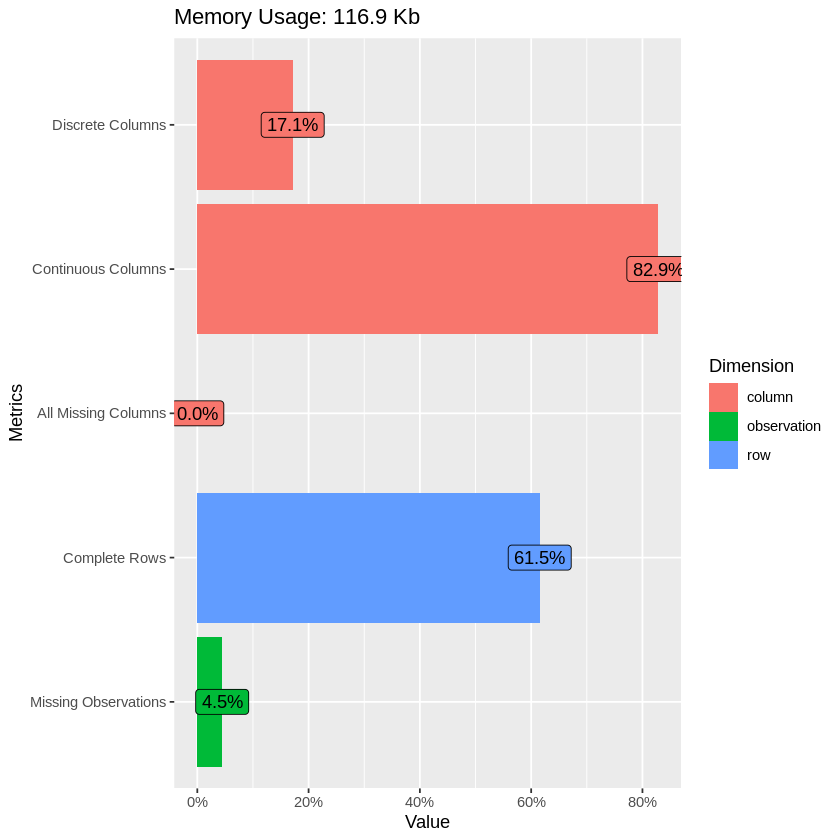

In [14]:
plot_intro(clean_data)

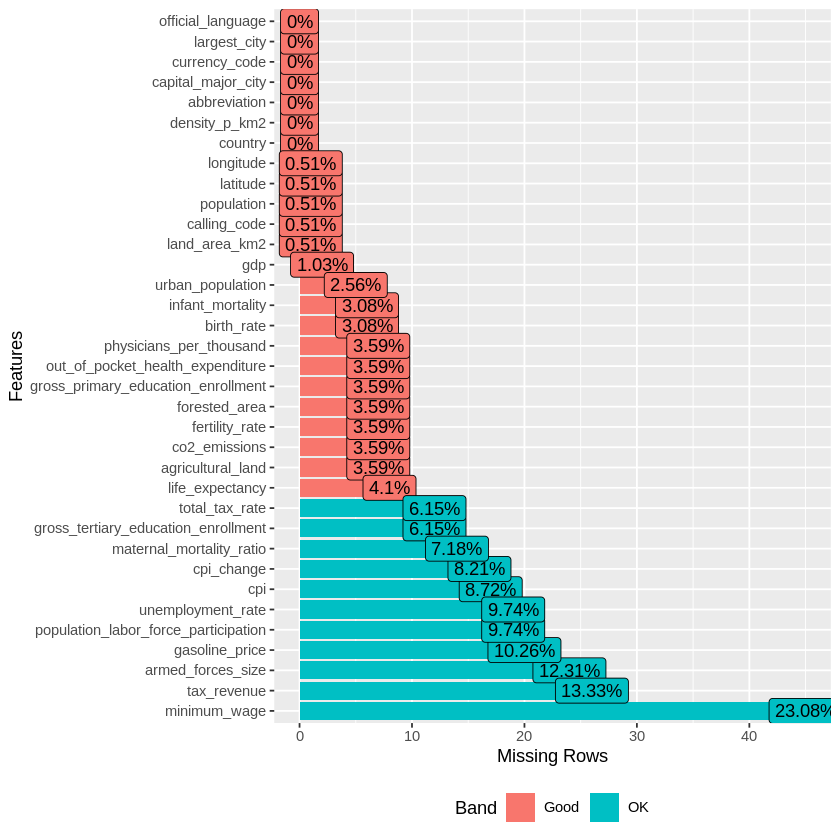

In [15]:
plot_missing(clean_data)

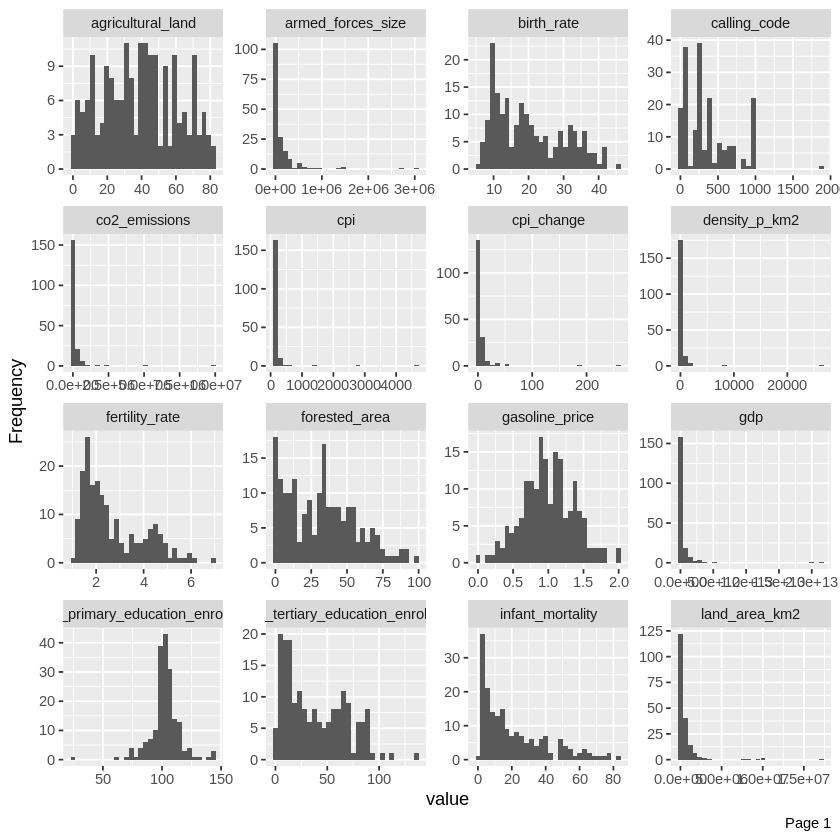

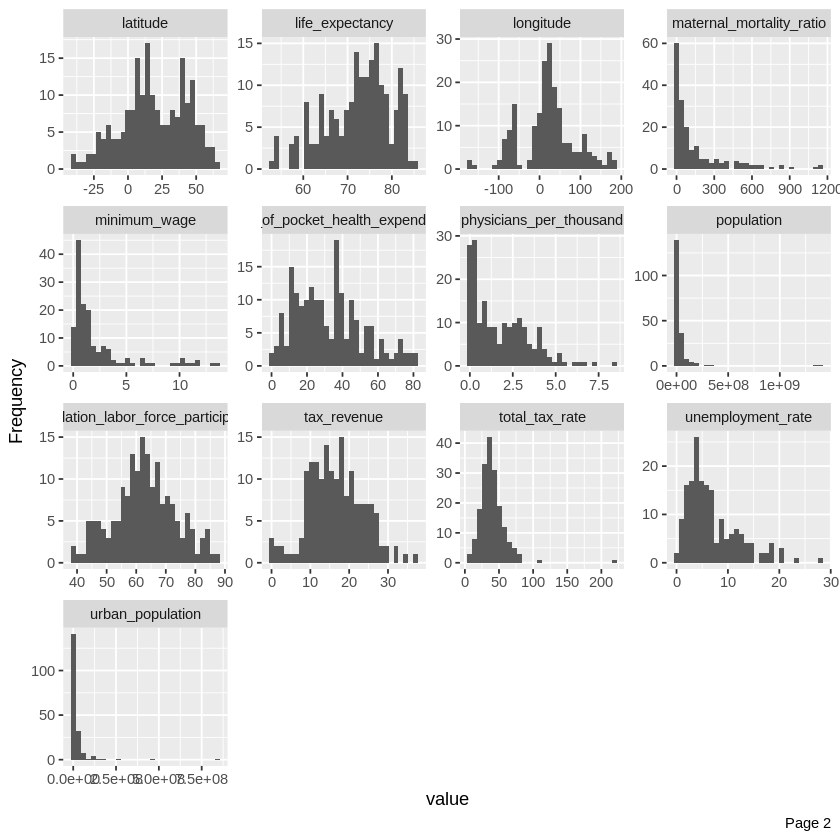

In [16]:
plot_histogram(clean_data)

Warning message in dummify(data, maxcat = maxcat):
“Ignored all discrete features since `maxcat` set to 5 categories!”


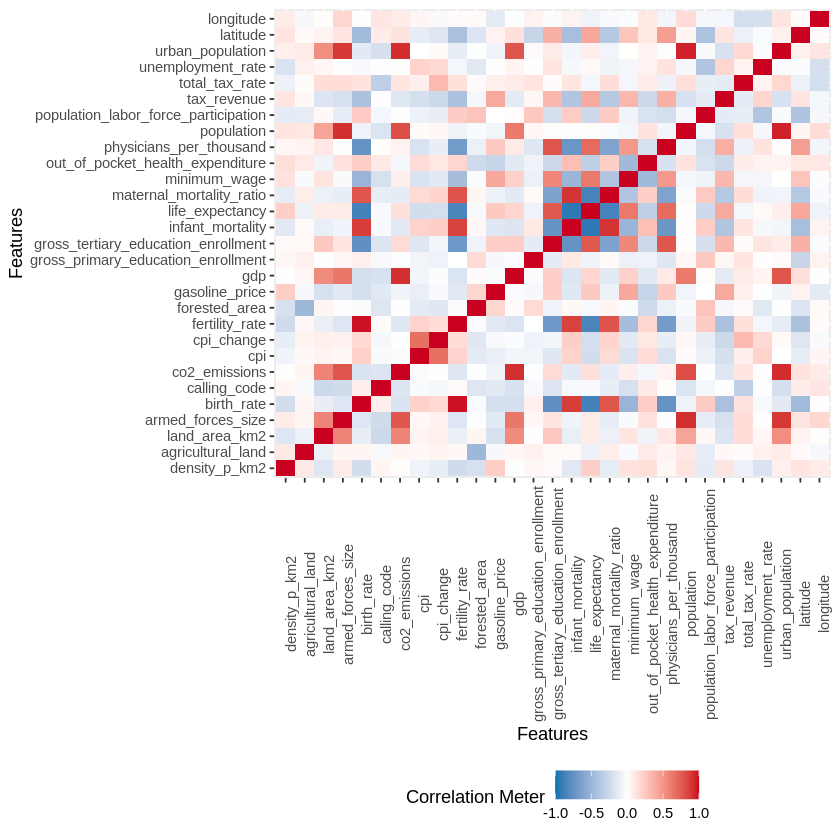

In [17]:
plot_correlation(na.omit(clean_data), maxcat = 5L)


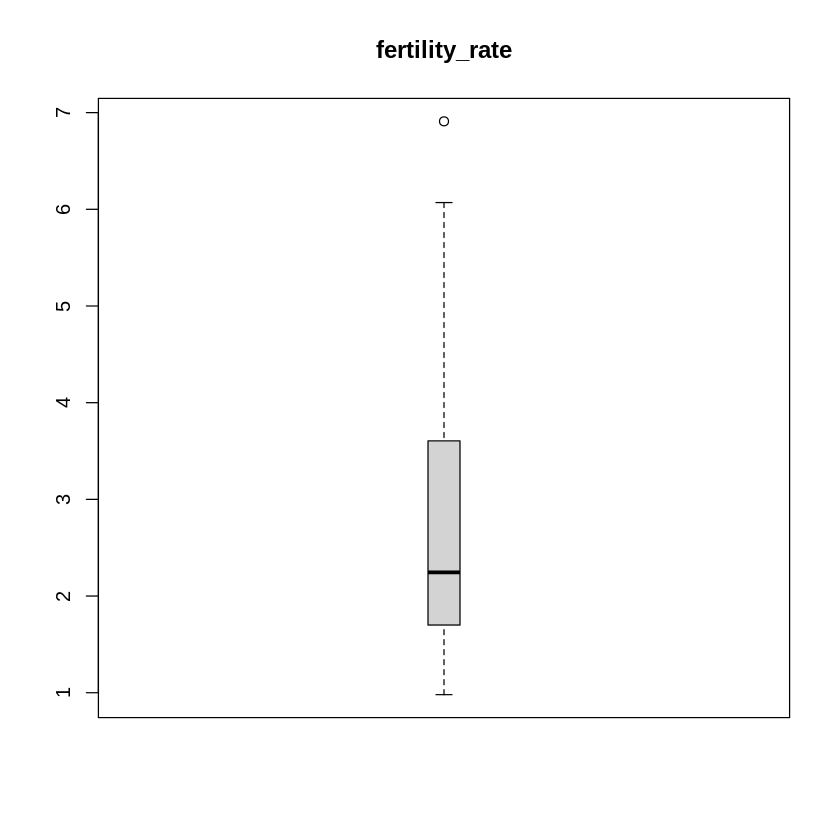

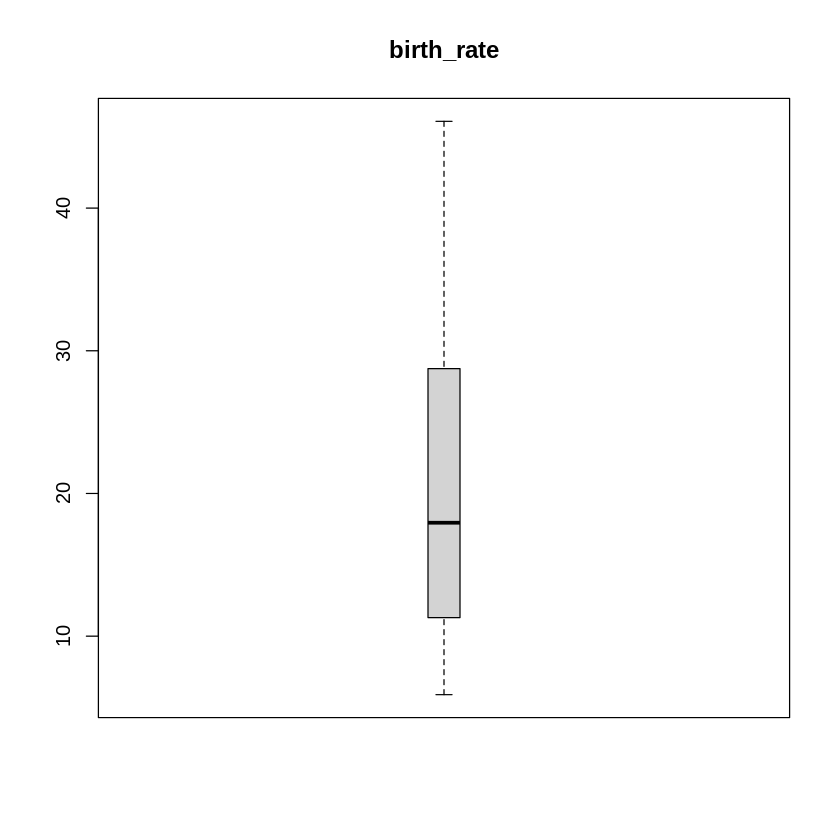

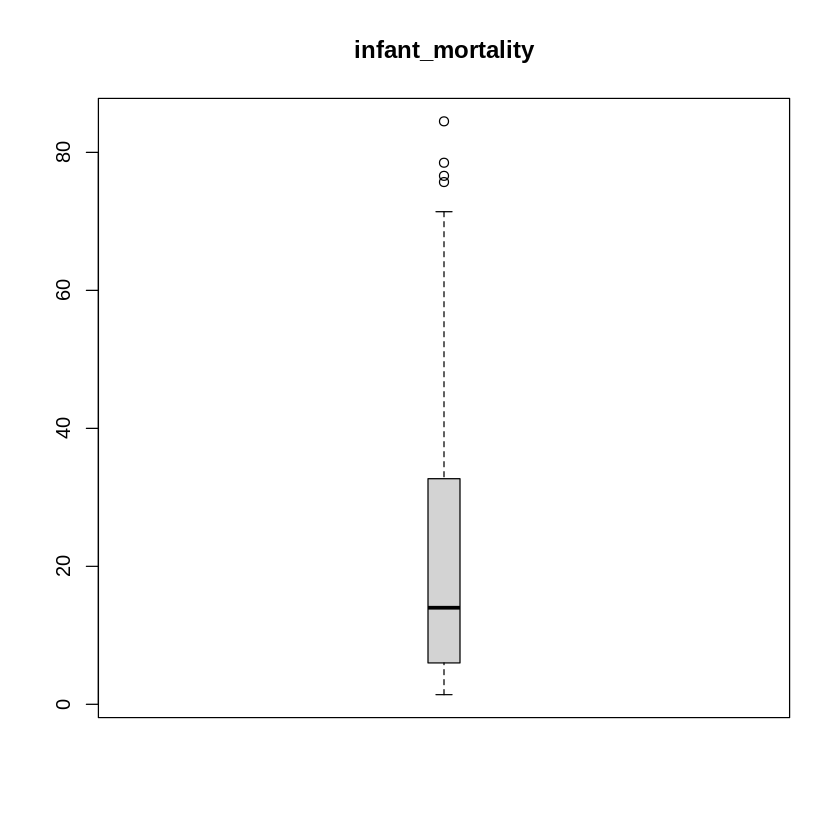

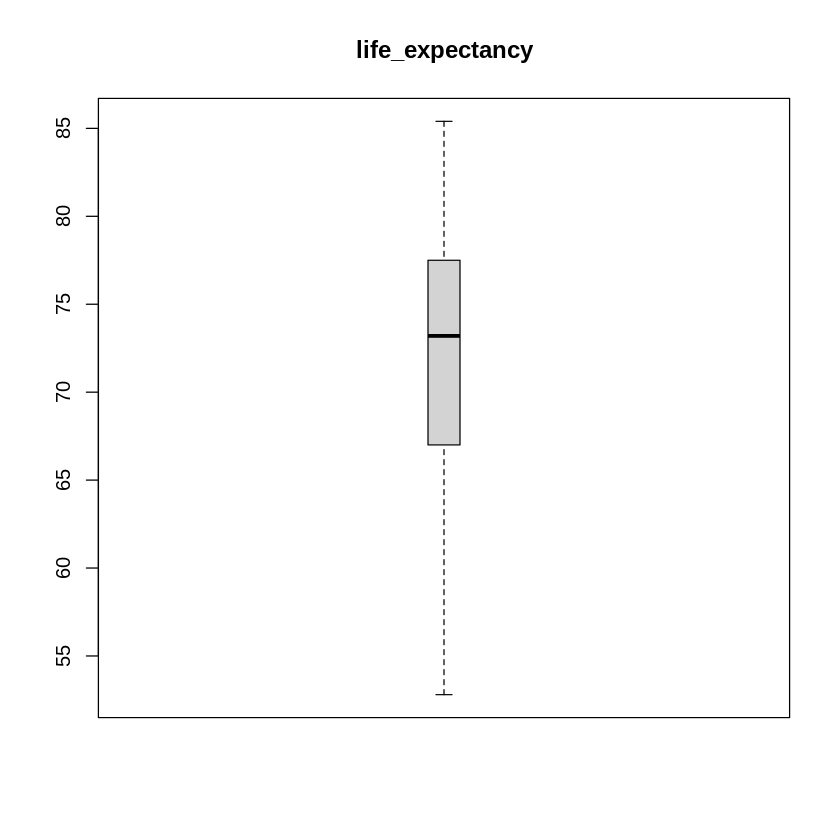

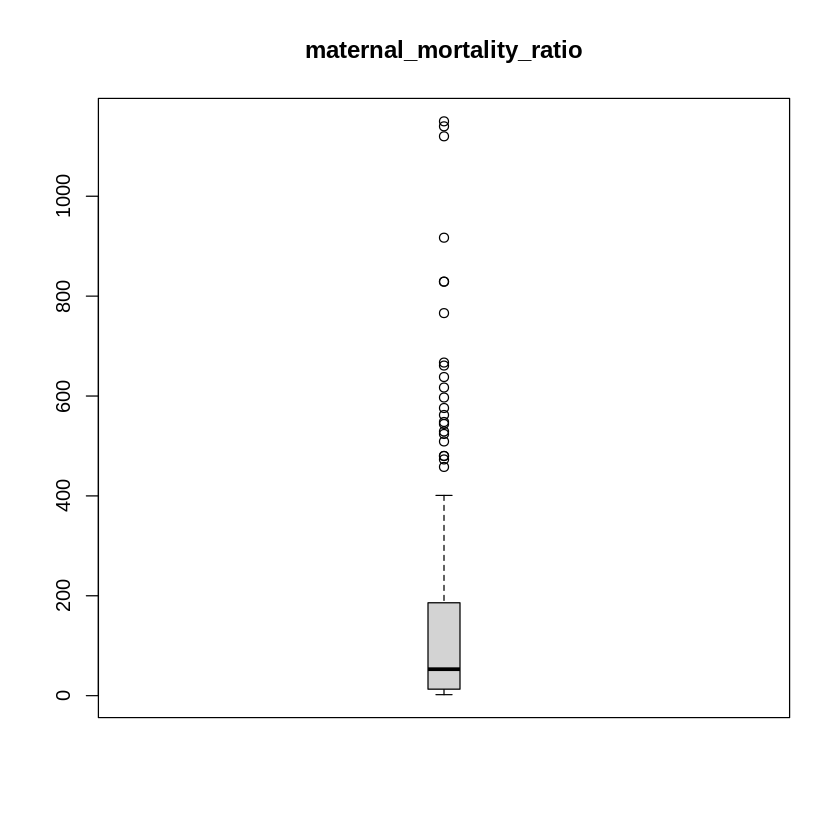

In [19]:
# Define the variables to be plotted
variables <- c("fertility_rate", "birth_rate", "infant_mortality", "life_expectancy", "maternal_mortality_ratio")

# Loop over the variables and create a boxplot for each one
for (var in variables) {
  boxplot(clean_data[[var]][!is.na(clean_data[[var]])], main=var, boxwex=0.1)
}

Press [enter] to continue 
Press [enter] to continue


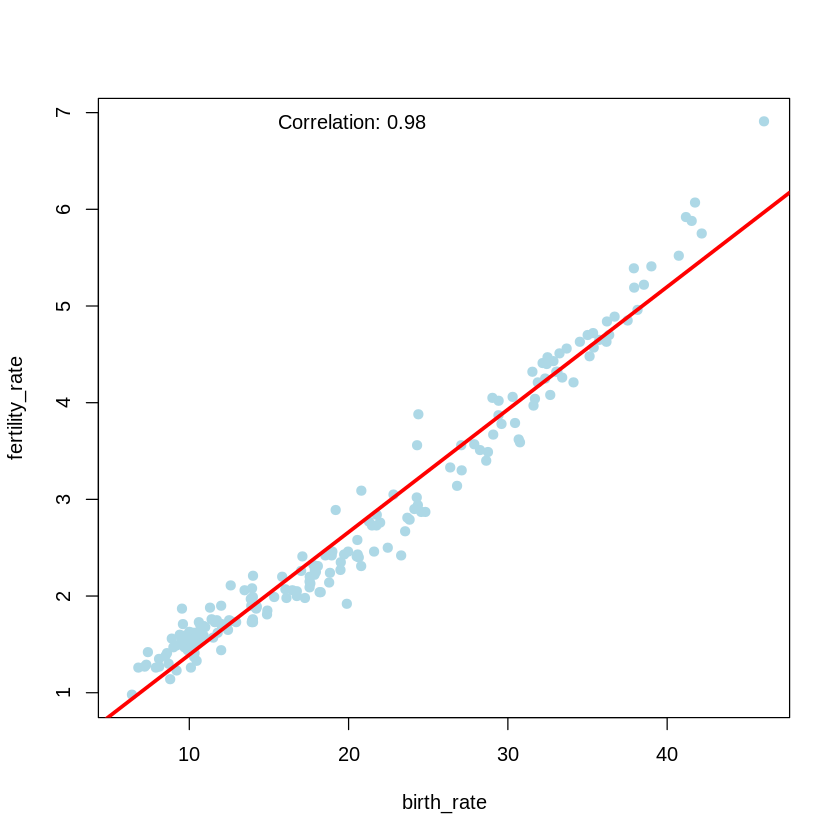

Press [enter] to continue


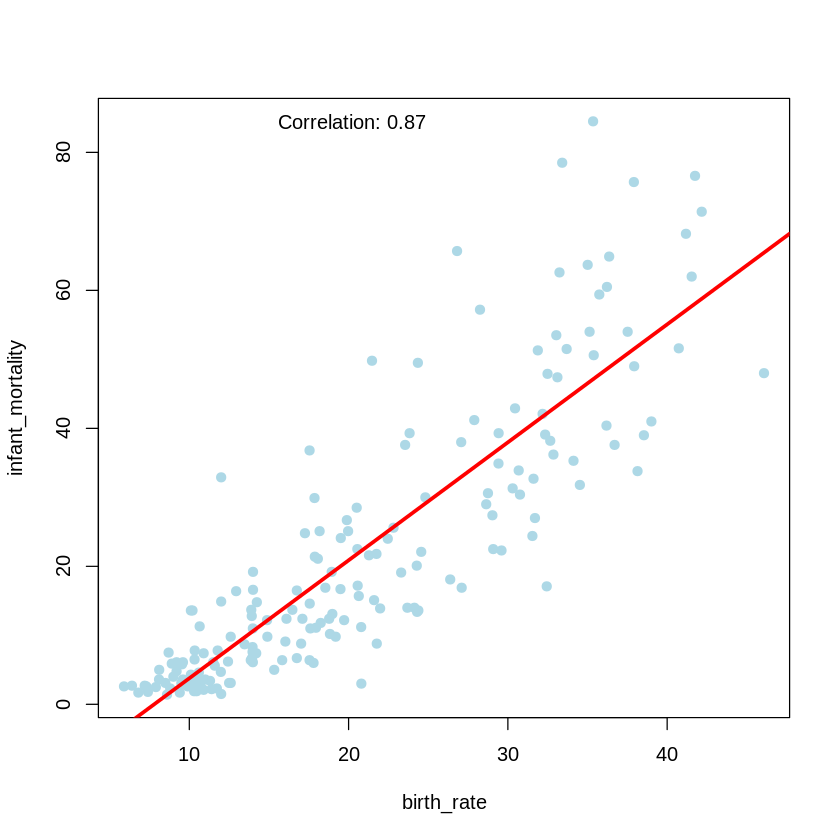

Press [enter] to continue


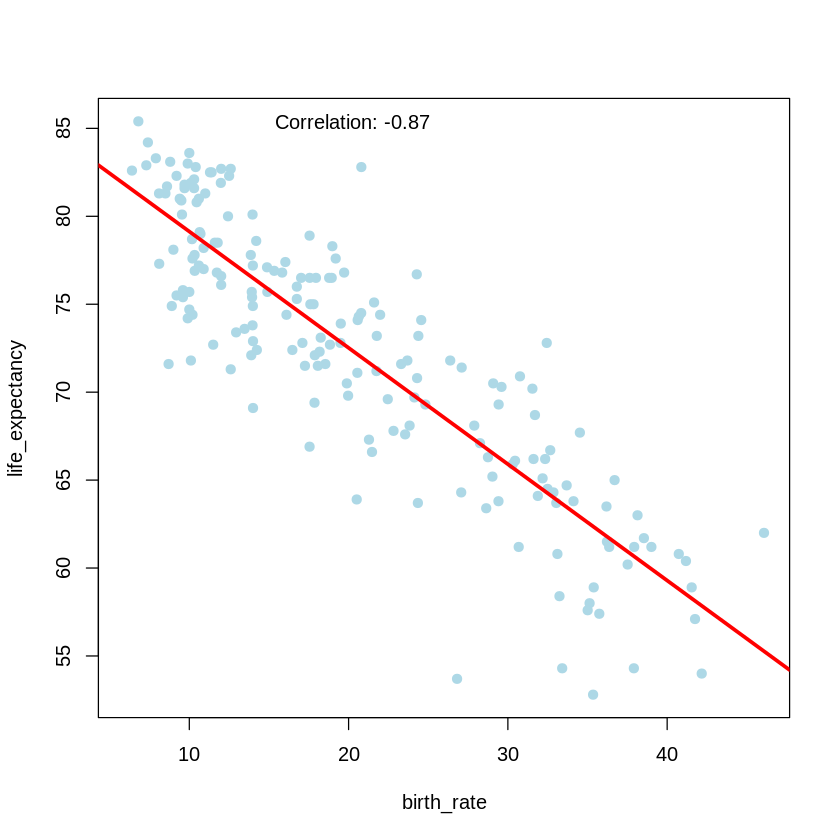

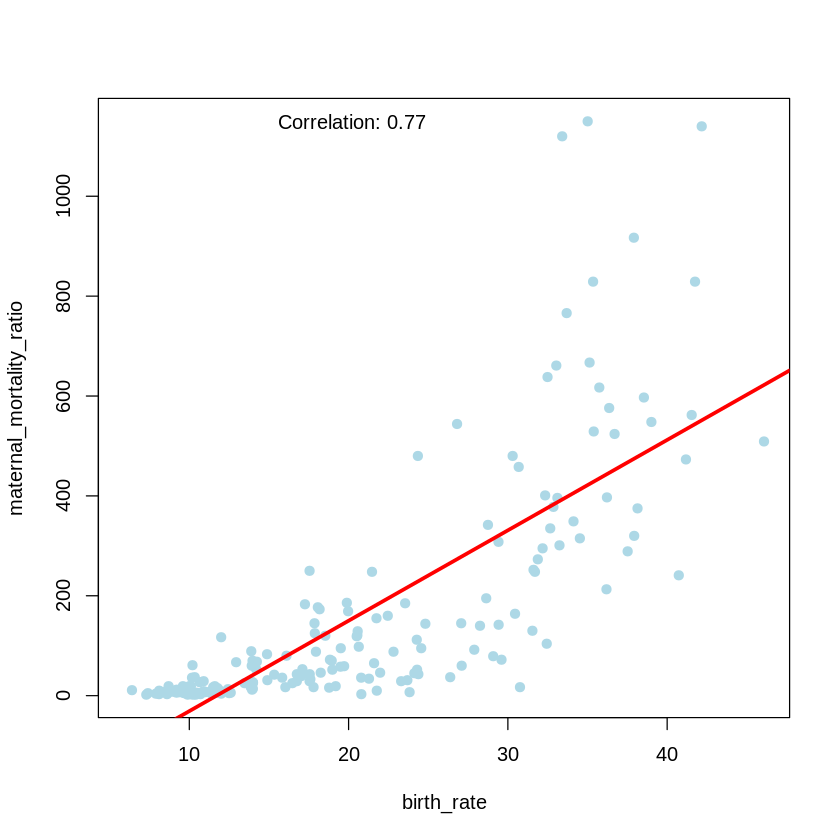

In [20]:
# Define the variables to be plotted against birth_rate
variables <- c("fertility_rate", "infant_mortality", "life_expectancy", "maternal_mortality_ratio")

# Define a function that takes in two variable names and plots them
plot_with_correlation <- function(x_var, y_var) {

  # Creating the plot
  plot(clean_data[[x_var]], clean_data[[y_var]], pch = 19, col = "lightblue",
       xlab = x_var, ylab = y_var)

  # Pearson correlation
  cor_val <- cor.test(clean_data[[x_var]], clean_data[[y_var]], use="complete.obs")$estimate
  cor_text <- paste("Correlation:", round(cor_val, 2))
  text(x = mean(clean_data[[x_var]], na.rm=TRUE), y = max(clean_data[[y_var]], na.rm=TRUE), labels = cor_text)

  # Regression line (optional)
  abline(lm(clean_data[[y_var]] ~ clean_data[[x_var]]), col = "red", lwd = 3)
}

# Loop over the variables and create a plot for each one
for (var in variables) {
  # Plot "birth_rate" against the current variable
  plot_with_correlation("birth_rate", var)

  # Pause before the next plot
  readline(prompt="Press [enter] to continue")
}

